<a href="https://colab.research.google.com/github/kavana-senorita/Logistic-Regression-/blob/main/Logistic_Regression(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Rgression:**

Logistic Regression is a statistical method used for binary classification problems. It is also  usually used for Binary output,sigmoid function, cost Function to predict the loss, Gradient Descent to minimize the cost function and to find the best parameters.


**USA Rainfall Prediction**:

The USA Rainfall Prediction dataset typically contains meteorological data such as temperature, humidity, wind speed, atmospheric pressure, and other environmental factors collected over time. The goal is to predict whether or not it will rain on a given day or at a given time based on these weather attributes. The data may be collected from multiple weather stations across the United States and represent different regions or periods.

Rainfall prediction is crucial for agriculture, water resource management, and disaster prevention. Accurate rainfall predictions help in planning and mitigating the effects of extreme weather events, such as floods or droughts.

**Our Objective** is to build a Logistic Regression model so that can predict whether it will rain  tomorrow or not based on the given  environmental data.

**Problem Statement:**

The problem involves developing a machine learning model that predicts the likelihood of rainfall based on historical weather data. Specifically, given various features such as temperature, humidity, wind speed, and atmospheric pressure, the objective is to predict a binary outcome: rain (yes/no)/ (0/1).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/USA Rainfall prediction.zip')
data

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...,...,...
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,2025-12-30,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1


**EDA Analysis**

In [ ]:
data.shape

(73100, 9)

In [ ]:
data.size

657900

In [ ]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


In [ ]:
data.isna().sum()/len(data) * 100

,0
Date,0.0
Location,0.0
Temperature,0.0
Humidity,0.0
Wind Speed,0.0
Precipitation,0.0
Cloud Cover,0.0
Pressure,0.0
Rain Tomorrow,0.0


In [ ]:
dup = data.duplicated().value_counts()
dup

,count
False,73100


In [ ]:
data['Location'].unique()

array(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
       'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose',
       'Austin', 'Jacksonville', 'Fort Worth', 'Columbus', 'Indianapolis',
       'Charlotte', 'San Francisco', 'Seattle', 'Denver',
       'Washington D.C.'], dtype=object)

In [ ]:
data['Location'].nunique()

20

In [ ]:
data['Rain Tomorrow'].unique()

array([0, 1])

In [ ]:
data.drop('Date',axis='columns',inplace=True)

**Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:**

In [ ]:
px.histogram(data,x='Location',color='Rain Tomorrow')

In [ ]:
px.scatter(data.sample(500),
           x='Temperature',
           y='Pressure',
           color='Rain Tomorrow')

<Axes: xlabel='Humidity', ylabel='Wind Speed'>

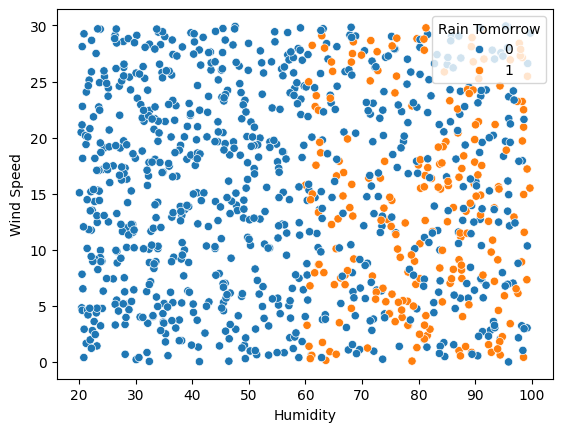

In [ ]:
sns.scatterplot(data.sample(1000),x='Humidity',y='Wind Speed',hue='Rain Tomorrow')

<Axes: xlabel='Precipitation', ylabel='Cloud Cover'>

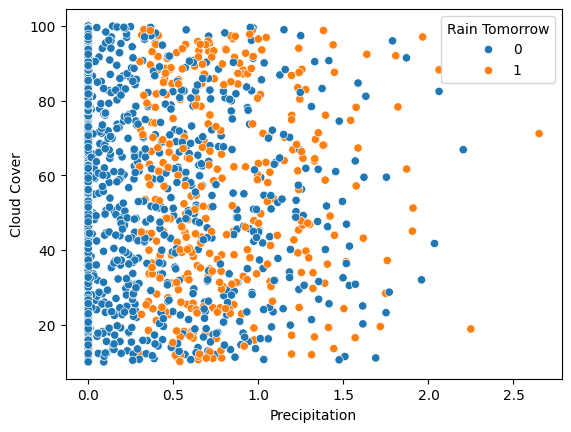

In [ ]:
sns.scatterplot(data.sample(1500),x='Precipitation',y='Cloud Cover',hue='Rain Tomorrow')

**Here we are going to find out the correlation between the each column of the features  are related with the target Column before we importing the model represtend by using the heat map.**

In [ ]:
correlation_columns=['Temperature','Humidity','Pressure','Cloud Cover','Rain Tomorrow']
correlation_columns

['Temperature', 'Humidity', 'Pressure', 'Cloud Cover', 'Rain Tomorrow']

In [ ]:
correlation_matrix = data[correlation_columns].corr()
print("Correlation_Martix:")
print(correlation_matrix)

Correlation_Martix:
               Temperature  Humidity  Pressure  Cloud Cover  Rain Tomorrow
Temperature       1.000000  0.003915  0.004250     0.000318      -0.003593
Humidity          0.003915  1.000000 -0.001780    -0.002585       0.461646
Pressure          0.004250 -0.001780  1.000000    -0.004347      -0.002179
Cloud Cover       0.000318 -0.002585 -0.004347     1.000000      -0.003385
Rain Tomorrow    -0.003593  0.461646 -0.002179    -0.003385       1.000000


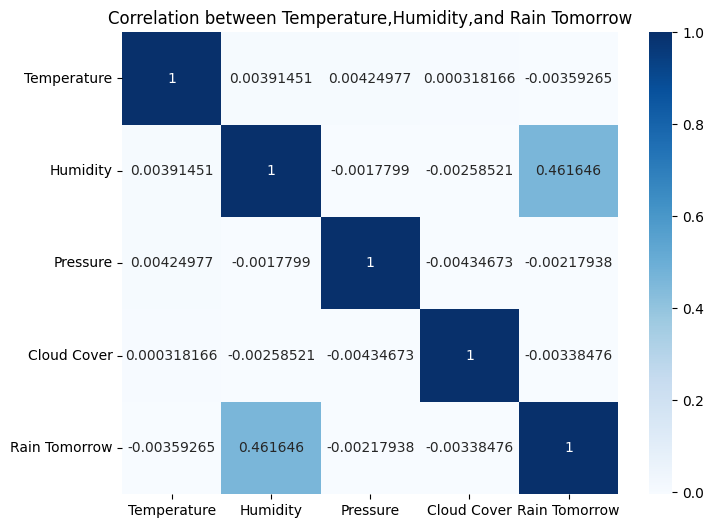

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='Blues',fmt="g")
plt.title('Correlation between Temperature,Humidity,and Rain Tomorrow')
plt.show()

In [ ]:
data.drop('Location',axis='columns',inplace=True)

In [ ]:
data

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,1.105756,0.684143,1.541362,0.000000,69.617966,1.032198,0
1,0.894653,-1.351014,-0.297798,0.526995,41.606048,-0.456051,0
2,0.780018,0.210917,-0.096107,0.916884,77.364763,-1.206671,1
3,0.639191,-0.005899,0.510584,0.094134,52.541196,-1.295000,0
4,-1.391804,-1.088542,-1.306808,1.361272,85.584000,1.317322,0
...,...,...,...,...,...,...,...
73095,-1.215891,0.226498,1.587369,0.000000,54.168514,-1.390448,0
73096,-0.620649,-1.268732,-0.315511,0.871000,22.068055,-1.216821,0
73097,-0.430062,1.598251,-1.398506,1.191956,52.336048,0.558964,1
73098,0.028046,0.174498,1.109104,0.483421,76.785280,1.347281,1


**The train_test_split function from sklearn.model_selection is used to split a dataset into two subsets: one for training a machine learning model (the training set) and one for evaluating the model's performance**

**Training Set:** This is the subset of the data that the model uses to learn patterns and relationships between features and the target variable. It is used to fit or train the model.


**Test Set:** This is the subset of the data that is kept separate from the training process and is used only after the model is trained. It allows you to evaluate how well the model generalizes to new, unseen data.


 In This dataset will split the data into 30% for training and 20% for testing, ensuring that the split is reproducible with random_state=42.





In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data,test_size=0.3,random_state=42)



In [ ]:
train_inputs=train_data.iloc[:,:9]
train_targets=train_data['Rain Tomorrow']
test_inputs=test_data.iloc[:,:9]
test_targets=test_data['Rain Tomorrow']

In [ ]:
train_data

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
61925,-0.265815,-0.727708,-1.551040,1.256418,92.779868,-1.238665,0
36316,-0.583328,1.186124,-1.723076,0.388164,49.239313,-0.204586,1
29247,-1.366403,0.049183,0.513872,0.416966,39.610102,-0.375033,1
40876,-1.195408,0.633114,-0.154018,0.630508,38.490496,0.590346,1
36711,1.072886,0.785761,1.012356,0.776666,56.340595,-0.276052,1
...,...,...,...,...,...,...,...
37194,0.799926,-0.516960,0.883984,0.210545,13.908810,-1.193891,0
6265,1.122102,-0.576747,0.371897,1.444926,57.305491,-0.527158,0
54886,-0.358591,1.733599,1.443394,0.176079,47.565287,-1.719745,0
860,-1.376332,-0.113624,-0.336280,1.337299,74.404842,1.588310,0


In [ ]:
test_data

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
66127,-0.847766,0.031567,1.145305,0.000000,49.344512,0.740329,0
43485,0.555633,1.195131,-0.098647,0.060954,86.571375,0.648782,0
34304,-1.460693,0.354574,0.366567,0.942199,31.233485,0.739501,1
34317,-0.076645,1.033680,0.976902,0.259003,10.990360,-0.158107,0
38631,-0.679143,0.995431,1.179011,0.087099,17.705639,-1.413455,0
...,...,...,...,...,...,...,...
43174,-1.419494,-0.278891,-0.153274,1.484543,54.414564,0.461803,0
61942,0.197114,0.001869,0.767728,0.000000,62.450986,0.706203,0
7362,1.538798,-0.094894,-1.410193,0.000000,55.501947,-1.369416,0
22037,-0.877887,0.646763,0.172540,0.195694,60.669762,1.293335,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
columns_to_standardize=['Temperature','Humidity','Wind Speed']
data[columns_to_standardize]=scaler.fit_transform(data[columns_to_standardize])
data

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,1.105756,0.684143,1.541362,0.000000,69.617966,1.032198,0
1,0.894653,-1.351014,-0.297798,0.526995,41.606048,-0.456051,0
2,0.780018,0.210917,-0.096107,0.916884,77.364763,-1.206671,1
3,0.639191,-0.005899,0.510584,0.094134,52.541196,-1.295000,0
4,-1.391804,-1.088542,-1.306808,1.361272,85.584000,1.317322,0
...,...,...,...,...,...,...,...
73095,-1.215891,0.226498,1.587369,0.000000,54.168514,-1.390448,0
73096,-0.620649,-1.268732,-0.315511,0.871000,22.068055,-1.216821,0
73097,-0.430062,1.598251,-1.398506,1.191956,52.336048,0.558964,1
73098,0.028046,0.174498,1.109104,0.483421,76.785280,1.347281,1


**Logistic Rgression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_inputs,train_targets)

LogisticRegression()

predicting Model

In [ ]:
predicted_model = model.predict(test_inputs)
predicted_model

array([0, 0, 1, ..., 0, 0, 0])

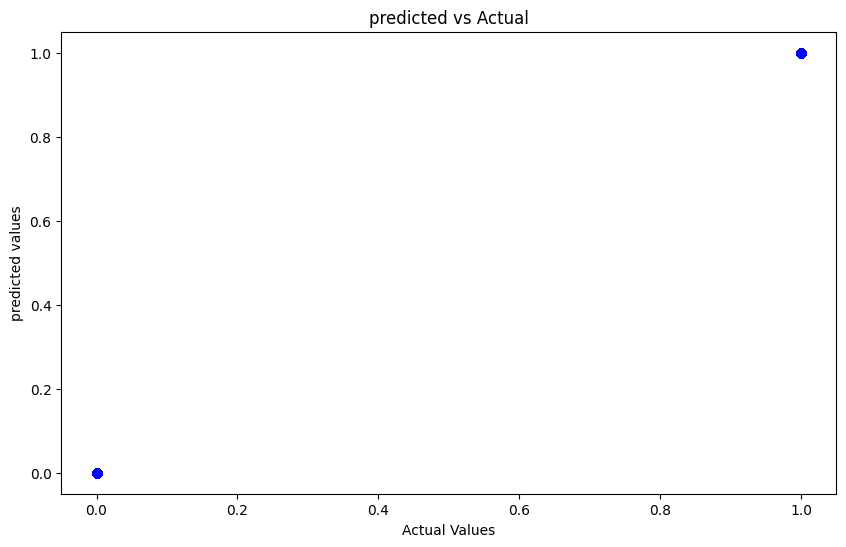

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(test_targets,predicted_model,color = 'blue')
plt.title('predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('predicted values')
plt.show()

In [ ]:
from sklearn.metrics import root_mean_squared_error
rmse=np.sqrt(root_mean_squared_error(test_targets,predicted_model))
rmse


0.0

**Decission Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor()
model_dt.fit(train_inputs,train_targets)


DecisionTreeRegressor()

In [ ]:
predict_dt=model_dt.predict(test_inputs)
predict_dt

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import root_mean_squared_error
rmse=np.sqrt(root_mean_squared_error(test_targets,predict_dt))
rmse

0.0

**Random Forests Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor()
model_rf.fit(train_inputs,train_targets)

RandomForestRegressor()

In [ ]:
predict_rf=model_rf.predict(test_inputs)
predict_rf

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import root_mean_squared_error
rmse=np.sqrt(root_mean_squared_error(test_targets,predict_rf))
rmse

0.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_targets,predict_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17062
           1       1.00      1.00      1.00      4868

    accuracy                           1.00     21930
   macro avg       1.00      1.00      1.00     21930
weighted avg       1.00      1.00      1.00     21930

